In [18]:
from numpy import unique
from numpy import where
from numpy import multiply
from numpy import array
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

#import data
data = pd.read_csv('dataFiles/test_data1_WithOutputs_withCalculatedValues.csv')
ls = data['L/S Ratio']
torque = data['DetTorque']
MRT = data['DetMRT']
extent = data['Extent of gran']
relvis = data['Binder Viscosity (mPa.s)'] / 0.001
fill = data['Calc Fill level']
nKE = data['n KE']
X = array([multiply(relvis,ls),fill]).T

[[0.28061336 0.39130788 0.60089866 0.29807692]
 [0.36226288 0.44590027 0.44111267 0.94078947]
 [0.35193287 0.35793362 0.71397236 0.75      ]
 [0.32052345 0.12371752 0.33688656 0.05147059]]


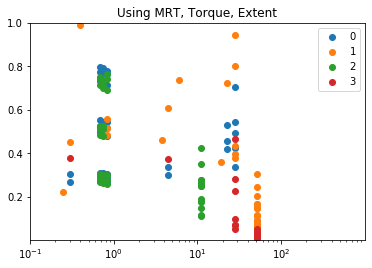

In [19]:
# create model
X1 = array([torque,MRT,extent,nKE]).T
model = KMeans(n_clusters=4)
X1_normed = X1 / X1.max(axis=0)
model.fit(X1_normed)
yhat = model.predict(X1_normed)
clusters = unique(yhat)
print(model.cluster_centers_)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=cluster)
plt.legend()
# show the plot
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.title('Using MRT, Torque, Extent')
plt.show()
df_prob = pd.DataFrame(yhat)
df_prob.to_clipboard()

[[ 2.86031354 39.11441924 19.93454005  9.18518519]
 [ 2.55927844 11.83289518 15.18547406  8.        ]
 [ 2.56676818 27.02810033 29.37406275  9.33333333]
 [ 3.00157601 63.61156503 24.03151118 13.2       ]]


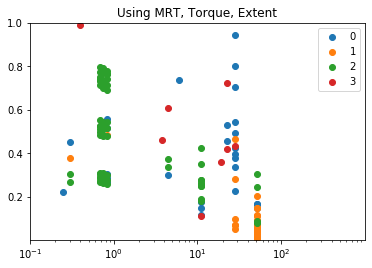

In [20]:
# create model
X1 = array([torque,MRT,extent,nKE]).T
model = KMeans(n_clusters=4)
model.fit(X1)
yhat = model.predict(X1)
clusters = unique(yhat)
print(model.cluster_centers_)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=cluster)
plt.legend()
# show the plot
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.title('Using MRT, Torque, Extent')
plt.show()
df_prob = pd.DataFrame(yhat)
df_prob.to_clipboard()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 0 0 0 0 0 3 4 4 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


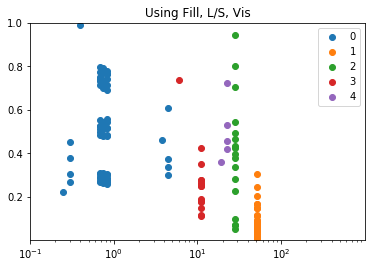

In [28]:
model = KMeans(n_clusters=5)
model.fit(X)
yhat = model.predict(X)
clusters = unique(yhat)
print(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=cluster)
plt.legend()
# show the plot
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.title('Using Fill, L/S, Vis')
plt.show()
df_prob = pd.DataFrame(yhat)
df_prob.to_clipboard()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 0 4 4 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


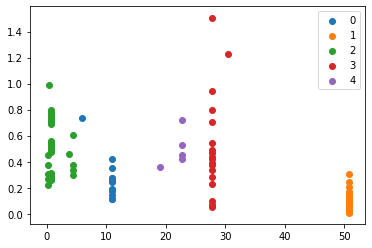

In [29]:
# mini batch kmeans
from sklearn.cluster import MiniBatchKMeans

mini_model = MiniBatchKMeans(n_clusters=5)
mini_model.fit(X)
mini_yhat = mini_model.predict(X)
mini_clusters = unique(mini_yhat)
print(mini_yhat)
# create scatter plot for samples from each cluster
for cluster in mini_clusters:
	# get row indexes for samples with this cluster
	row_ix = where(mini_yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=cluster)
plt.legend()
# show the plot
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


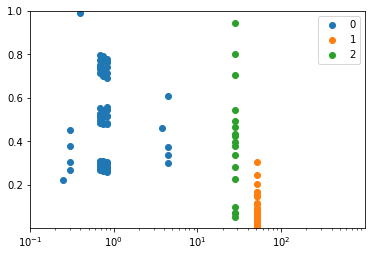

In [30]:
# mean shift
from sklearn.cluster import MeanShift
mean_model = MeanShift()
# fit model and predict clusters
mean_yhat = mean_model.fit_predict(X)
# retrieve unique clusters
mean_clusters = unique(mean_yhat)
print(mean_yhat)
# create scatter plot for samples from each cluster
for cluster in mean_clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1],label=cluster)
# show the plot
plt.legend()
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.show()

In [37]:
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from numpy import matrix

X_ke =  array([multiply(relvis,ls),fill,nKE]).T
gmm = GaussianMixture(n_components=3)
gmm.fit(X1)
prob_list = gmm.predict_proba(X1)


Text(0.5, 0.92, 'Gaussian Mixture Model')

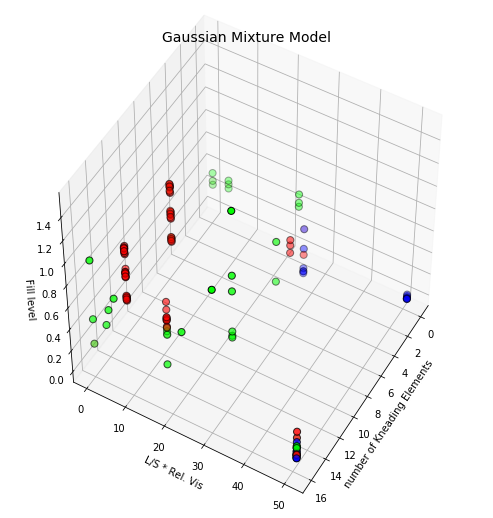

In [38]:
#Plotting
colored_arrays = matrix(prob_list)
colored_tuples = [array(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=30)
ax.scatter(X_ke[:, 2], X_ke[:, 0], X_ke[:, 1],
          c=colored_tuples,edgecolor="k", s=50)
ax.set_ylabel("L/S * Rel. Vis")
ax.set_zlabel("Fill level")
ax.set_xlabel("number of Kneading Elements")

plt.title("Gaussian Mixture Model", fontsize=14)

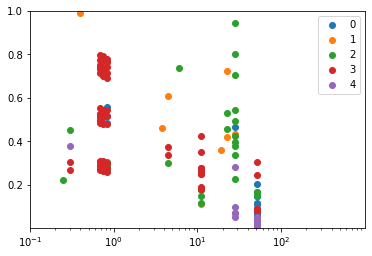

In [35]:
from sklearn.cluster import OPTICS

op_model = OPTICS(eps=0.5, min_samples=0.1)
# fit model and predict clusters
op_yhat = model.fit_predict(X1)
# retrieve unique clusters
op_clusters = unique(op_yhat)
# create scatter plot for samples from each cluster
for cluster in op_clusters:
	# get row indexes for samples with this cluster
	row_ix = where(op_yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1],label=cluster)
# show the plot
plt.legend()
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
km.fit(X_ke)
km.predict(X_ke)
labels = km.labels_
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=320)
ax.scatter(X_ke[:, 2], X_ke[:, 0], X_ke[:, 1],
          c=labels.astype(np.float),edgecolor="k", s=50)
ax.set_ylabel("L/S * Rel. Vis")
ax.set_zlabel("Fill level")
ax.set_xlabel("number of Kneading Elements")

plt.title("Kmeans Model", fontsize=14)

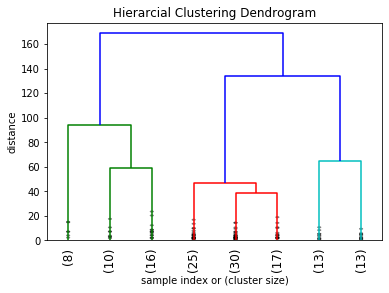

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from numpy import set_printoptions

H_cluster = linkage(X1,'ward')

plt.title('Hierarcial Clustering Dendrogram')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()


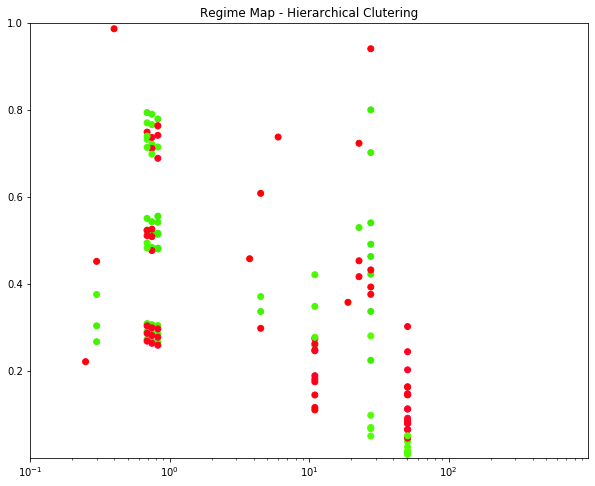

In [40]:
from scipy.cluster.hierarchy import fcluster
k=8
cluster_2 = fcluster(H_cluster,k,criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('Regime Map - Hierarchical Clutering')
plt.ylim(0,1)
plt.ylim([1e-4,1])
plt.xscale("log")
plt.xlim([1e-1,1000])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.show()